In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
from statsmodels.tsa.arima.model import ARIMA


In [5]:
df = pd.read_csv("/Users/aditineve/Desktop/Code alpha/car data.csv")  
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
df.info()
df.describe()
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


In [9]:

df.columns = df.columns.str.strip()



In [11]:
df.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [15]:
df.dropna(inplace=True)  


In [21]:

X = df[['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']]
y = df['Selling_Price']



In [19]:
df.columns


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [23]:
X = pd.get_dummies(X, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)


In [25]:
print(X.columns)


Index(['Year', 'Present_Price', 'Driven_kms', 'Owner', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Selling_type_Individual', 'Transmission_Manual'],
      dtype='object')


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [31]:
y_pred = model.predict(X_test)


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 1.2163740193342365
MSE: 3.4813498305207
RMSE: 1.8658375680966175
R² Score: 0.8488707839189298


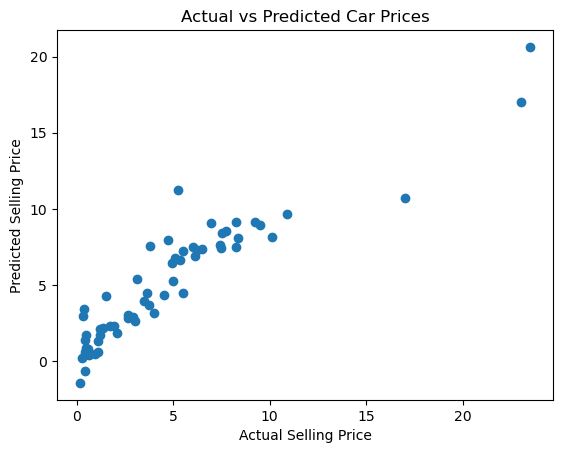

In [35]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()


In [37]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)


                   Feature  Coefficient
4         Fuel_Type_Diesel     2.534904
5         Fuel_Type_Petrol     0.739155
1            Present_Price     0.429070
0                     Year     0.352925
2               Driven_kms    -0.000006
3                    Owner    -0.905018
6  Selling_type_Individual    -1.191642
7      Transmission_Manual    -1.640074


In [39]:

print("Insights:")
print("- Newer cars and higher present price generally have higher selling prices.")
print("- Higher mileage (Driven_kms) reduces selling price.")
print("- Fuel type, transmission, and ownership influence car price.")


Insights:
- Newer cars and higher present price generally have higher selling prices.
- Higher mileage (Driven_kms) reduces selling price.
- Fuel type, transmission, and ownership influence car price.


In [43]:

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

from sklearn.metrics import r2_score
print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))


Random Forest R² Score: 0.9631179186468338


In [45]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance)


                   Feature  Importance
1            Present_Price    0.881174
0                     Year    0.063257
2               Driven_kms    0.034184
7      Transmission_Manual    0.010846
5         Fuel_Type_Petrol    0.003939
4         Fuel_Type_Diesel    0.002739
6  Selling_type_Individual    0.002714
3                    Owner    0.001148


In [47]:
import joblib
joblib.dump(model, "car_price_model.pkl")
joblib.dump(rf_model, "car_price_rf_model.pkl")


['car_price_rf_model.pkl']

In [49]:

loaded_model = joblib.load("car_price_model.pkl")




In [51]:
predictions = loaded_model.predict(X_test)
